In [26]:
# Import the packages we may need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.express as px

In [27]:
# Load the dataset
df = pd.read_csv('combined_df2.csv')
df

,Unnamed: 0.1,Unnamed: 0,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,P09341,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,0,0.0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,1,1.0,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,2,2.0,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,3,3.0,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,4,4.0,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,162,NaN,C29ZZ80Y4.01,HODG,9.87819,7.15139,7.71189,7.72042,10.23705,7.66455,...,7.19963,4.26576,7.80544,9.24521,5.59883,5.16395,9.03873,4.24414,1.53814,5.30002
1901,163,NaN,C29ZS2ML8.01,HODG,9.42403,6.16559,7.48199,7.30005,10.14143,7.84437,...,6.90334,4.14795,7.74788,8.80026,5.18470,7.53391,7.97077,3.84446,3.41778,3.84928
1902,164,NaN,C29ZFFZ0Q.01,HODG,10.26858,8.11759,7.78457,7.46200,10.25920,8.15014,...,6.69773,3.60838,7.67268,7.83666,5.35574,5.27098,7.55698,3.11025,1.56641,4.23022
1903,165,NaN,C29ZQOG4N.01,HODG,10.15491,7.09910,7.78078,7.45732,10.27589,8.17975,...,7.01314,5.67411,8.44027,8.79263,5.66616,7.99492,8.71554,5.02993,3.94930,4.90380


In [28]:
# compute the correlation matrix for the protein columns in your DataFrame
# Select only the numeric columns (proteins)
protein_cols = df.select_dtypes(include=['float64', 'int']).columns
correlation_matrix = df[protein_cols].corr()

#or can be used  "correlation_matrix = df.corr()", but it includes NaNs.

In [29]:
#Use Plotly to produce interactive heatmaps or scatter plots, 
#enable to zoom in on areas of interest and explore relationships more dynamically.

import plotly.express as px
import plotly.io as pio

#correlation_matrix = df.corr()



# Example for a heatmap using Plotly
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis', 
                labels=dict(x="Proteins", y="Proteins", color="Correlation"))




fig.update_layout(
    title={
        'text': "Correlation Matrix Interactive Heatmap",
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title at the center
    },
        width=800,
        height=600
)
plt.savefig('Correlation_Matrix.png', format='png', dpi=300)  # Adjust dpi for resolution
fig.show()

<Figure size 640x480 with 0 Axes>

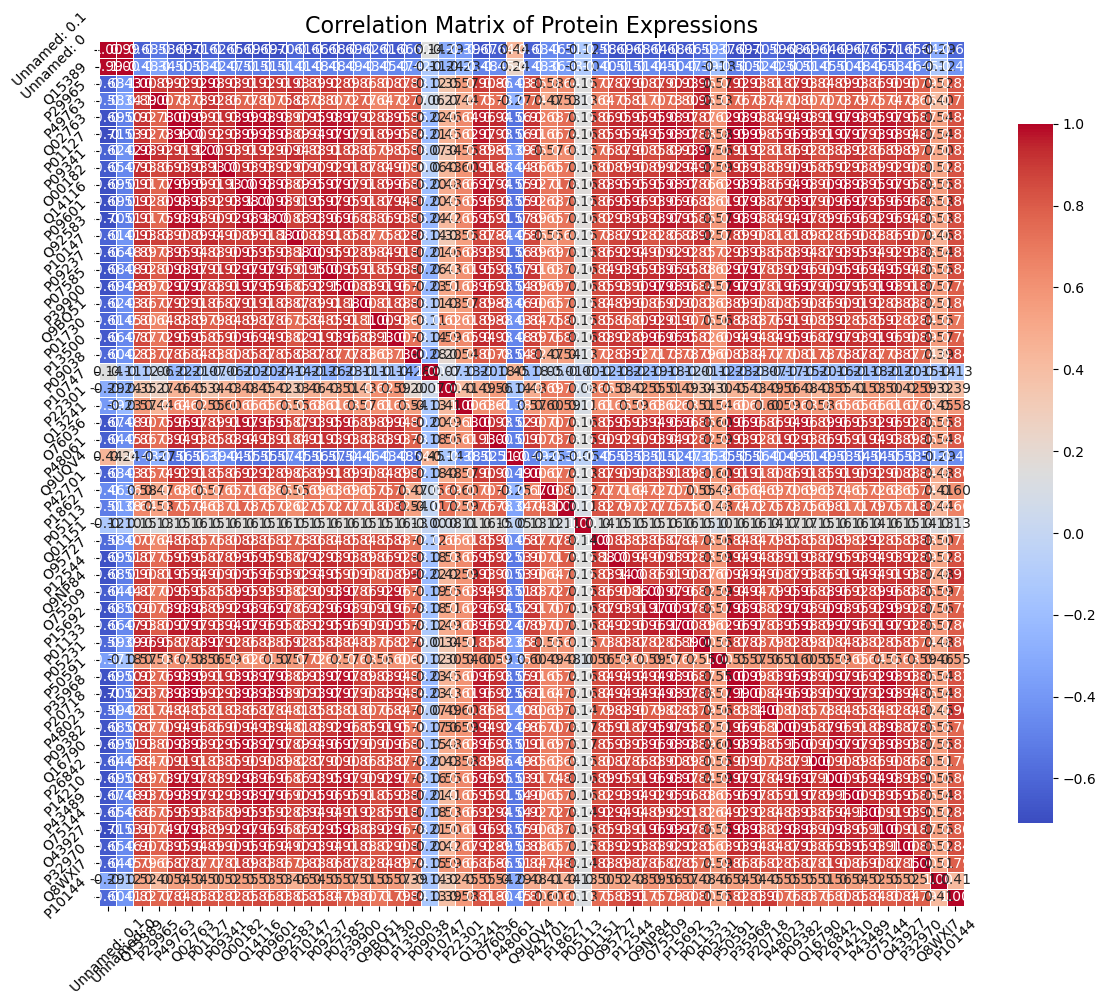

In [13]:
# visualize the correlation matrix using a heatmap from the seaborn library, 
#which provides a clear representation of the correlations.

# Set the size of the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix of Protein Expressions', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('Correlation_Matrix2.png', format='png', dpi=300)  # Adjust dpi for resolution
plt.show()

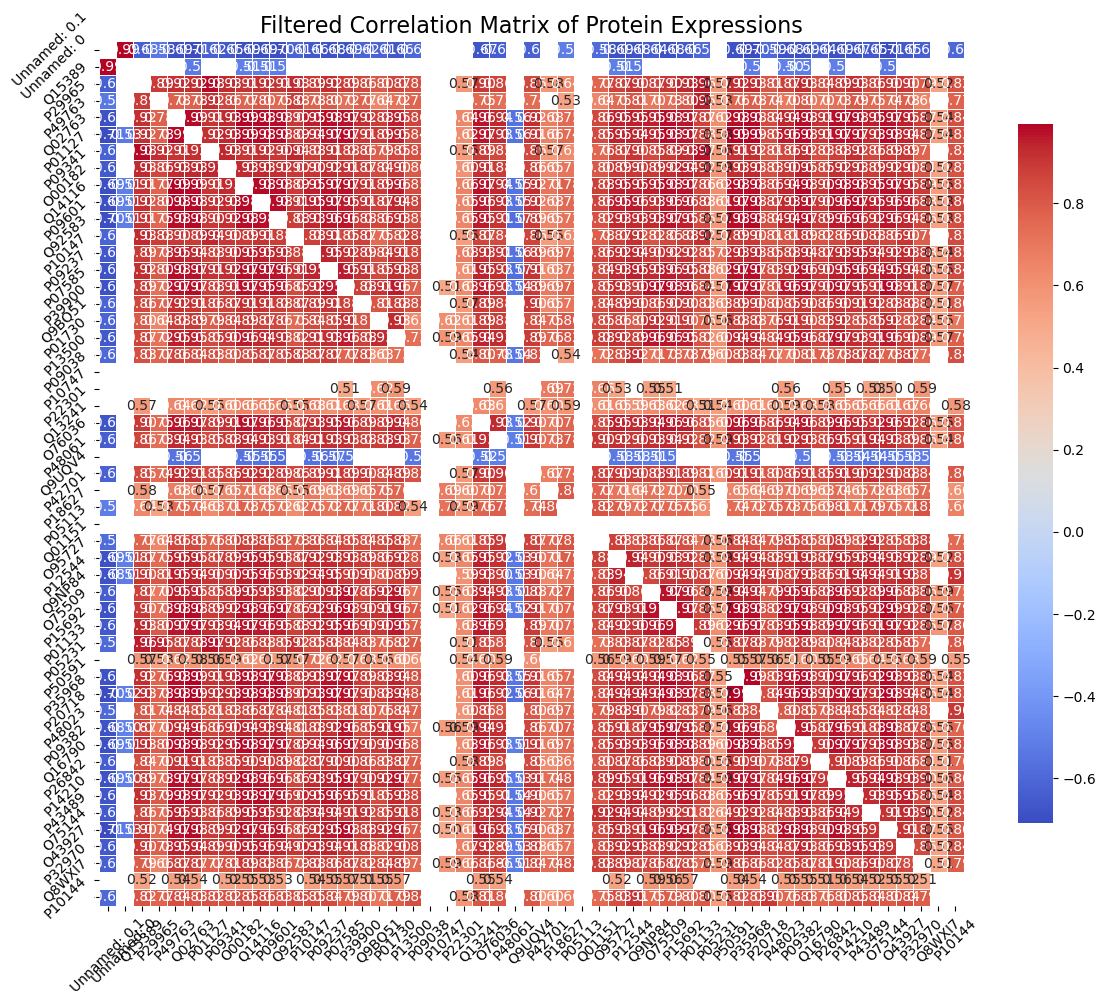

In [14]:
#to focus on proteins with a correlation above a certain threshold (e.g., > 0.5 or < -0.5), 
#filter the correlation matrix before visualization
# Filter the correlation matrix
threshold = 0.5
filtered_corr = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Visualize the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Filtered Correlation Matrix of Protein Expressions', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

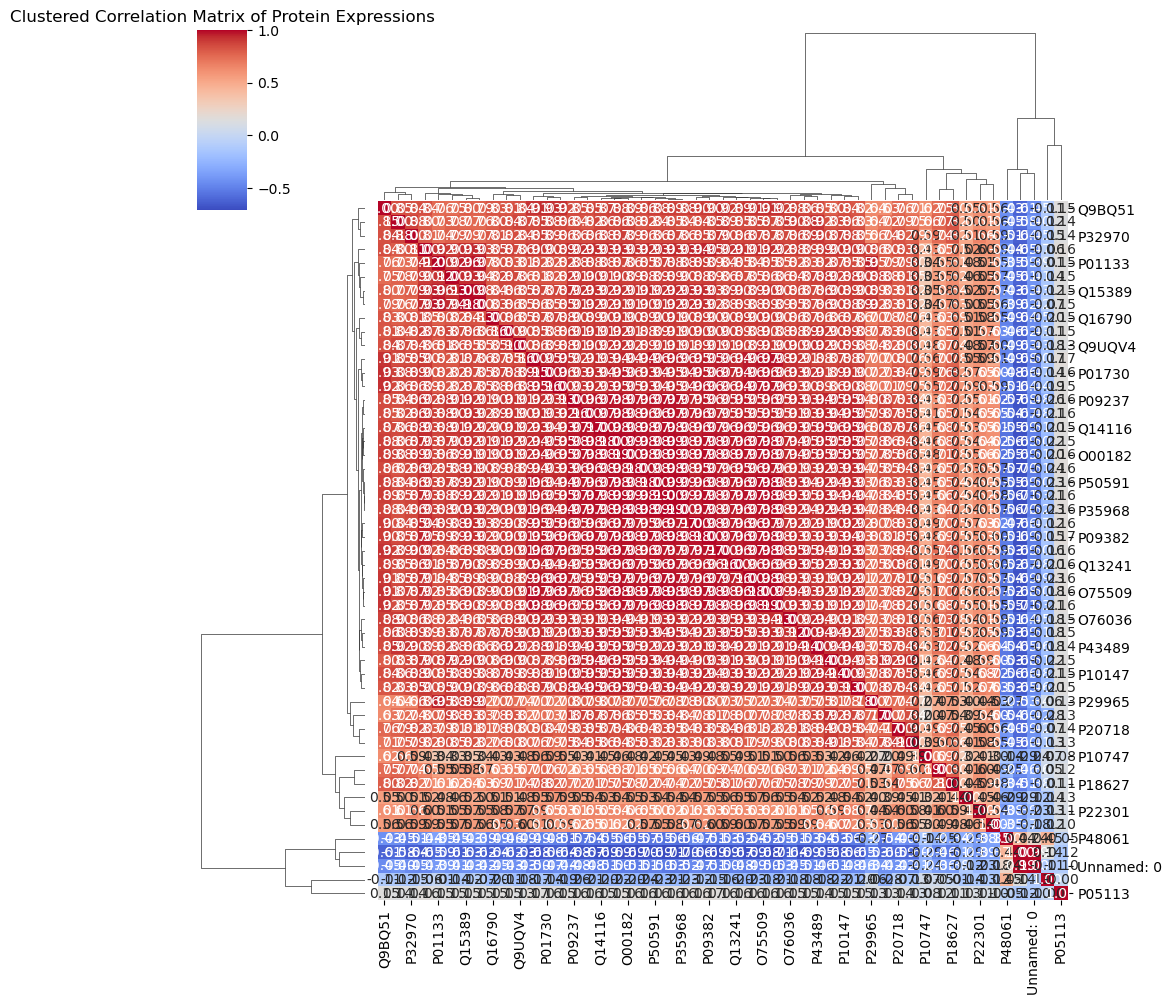

In [7]:
#Clustering the correlation matrix can group proteins with similar correlation patterns, 
#making the heatmap easier to read.

from scipy.cluster.hierarchy import linkage, dendrogram

# Compute a hierarchical clustering
linkage_matrix = linkage(correlation_matrix, method='average')

plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                figsize=(10, 10), row_linkage=linkage_matrix, col_linkage=linkage_matrix)
plt.title('Clustered Correlation Matrix of Protein Expressions')
plt.show()

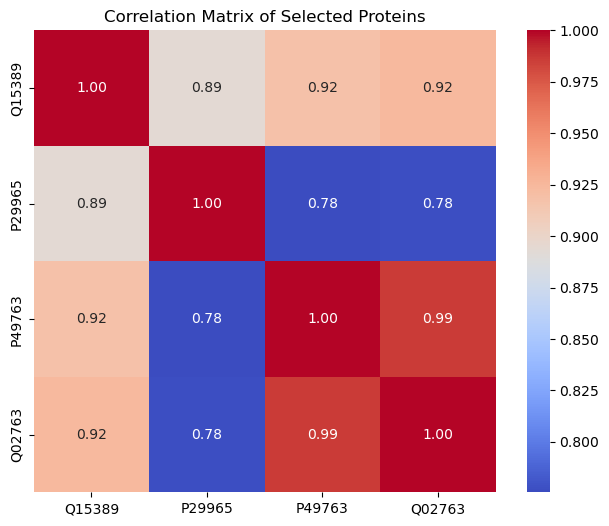

In [8]:
#Select a Subset of Proteins.certain proteins or groups, consider visualizing only those proteins.

# Example of selecting specific proteins
selected_proteins = ['Q15389', 'P29965', 'P49763', 'Q02763']  # Add your proteins of interest
correlation_matrix_subset = df[selected_proteins].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Selected Proteins')
plt.show()